# Nicolas Ramos Samboni - Big Data 2021/2022
### Evaluación por pares Módulo 3: “Big Data y Geospatial Data Science”

In [201]:
#import the needed pckg
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import geopandas as gpd
from plotnine import *


## Getting to know the data

In [3]:
satelites_data = pd.read_csv('satelliteDB.csv')
df = pd.DataFrame(satelites_data)
df.head(3).T 

,0,1,2
Official Name of Satellite,AAUSat-4,ABS-2,ABS-2A
Country/Organization of UN Registry,NR,NR,NR
Operator/Owner,University of Aalborg,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.
Country of Operator/Owner,Denmark,Multinational,Multinational
Users,Civil,Commercial,Commercial
Purpose,Earth Observation,Communications,Communications
Detailed Purpose,Automatic Identification System (AIS),NaN,NaN
Class of Orbit,LEO,GEO,GEO
Type of Orbit,Sun-Synchronous,NaN,NaN
Longitude of Geosynchronous Orbit (Degrees),0.0,75.0,-75.0


In [4]:
df.dtypes
#all the data is ready to work since it is in the correct type for operations

Official Name of Satellite                      object
Country/Organization of UN Registry             object
Operator/Owner                                  object
Country of Operator/Owner                       object
Users                                           object
Purpose                                         object
Detailed Purpose                                object
Class of Orbit                                  object
Type of Orbit                                   object
Longitude of Geosynchronous Orbit (Degrees)    float64
Perigee (Kilometers)                           float64
Apogee (Kilometers)                            float64
Eccentricity                                   float64
Inclination (Degrees)                          float64
Period (Minutes)                                object
Launch Mass (Kilograms)                         object
Dry Mass (Kilograms)                            object
Power (Watts)                                   object
Date of La

In [5]:
#consider that we could have null obj in the df
df.isnull().sum()
#in case of working with one of them, remove it or generate missing value

Official Name of Satellite                        0
Country/Organization of UN Registry               0
Operator/Owner                                    1
Country of Operator/Owner                         0
Users                                             1
Purpose                                           1
Detailed Purpose                               1051
Class of Orbit                                    1
Type of Orbit                                   521
Longitude of Geosynchronous Orbit (Degrees)      18
Perigee (Kilometers)                              1
Apogee (Kilometers)                               1
Eccentricity                                      1
Inclination (Degrees)                             1
Period (Minutes)                                  3
Launch Mass (Kilograms)                         103
Dry Mass (Kilograms)                            947
Power (Watts)                                   771
Date of Launch                                    4
Expected Lif

In [6]:
#Rename the columns to work easier
colnames = ['Name','Country','Operator', 'OperatorCountry',
'Users','Purpose','PurposeDetail','OrbitClass','OrbitType','orbitLon_d',
'Perigee_Km','Apogee_Km','e','Inclination','Period','LaunchMass','DryMass','Power',
'Date','Lifetime','Contractor','ContractorCountry','LaunchSite','LaunchVehicle','COSPAR','NORAD']

data = pd.read_csv('satelliteDB.csv',names=colnames,header=0)
data.head(3).T 

,0,1,2
Name,AAUSat-4,ABS-2,ABS-2A
Country,NR,NR,NR
Operator,University of Aalborg,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.
OperatorCountry,Denmark,Multinational,Multinational
Users,Civil,Commercial,Commercial
Purpose,Earth Observation,Communications,Communications
PurposeDetail,Automatic Identification System (AIS),NaN,NaN
OrbitClass,LEO,GEO,GEO
OrbitType,Sun-Synchronous,NaN,NaN
orbitLon_d,0.0,75.0,-75.0


# Top 5 countries with launched satellites

/usr/local/Caskroom/miniconda/base/envs/bigdata/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

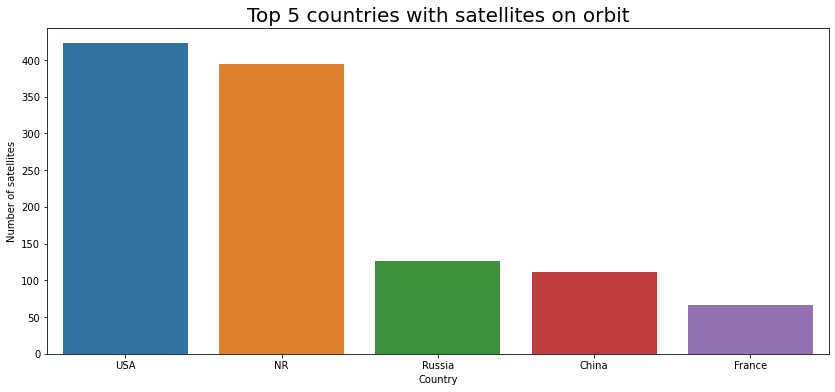

In [7]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(data['Country'], order = data.Country.value_counts().iloc[:5].index)

plt.title("Top 5 countries with satellites on orbit", fontdict = {'fontsize':20})
plt.ylabel("Number of satellites")

In [ ]:
#Other way to find the solution to this query
"""group_satname = data.groupby('Country') #group by the country owner
SatperCoun = group_satname.agg({'Name':'nunique'}) #every country has its own counter of unique values
y = SatperCoun['Name']
y = pd.DataFrame(y) #df with the number of sat and a index of every country

y.plot(kind='barh',
        title='Number of satellites per country',
        figsize=(10,10),
        legend=None,
        xlabel='Country')"""

# Top 5 Owners of Satellites

/usr/local/Caskroom/miniconda/base/envs/bigdata/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of satellites')

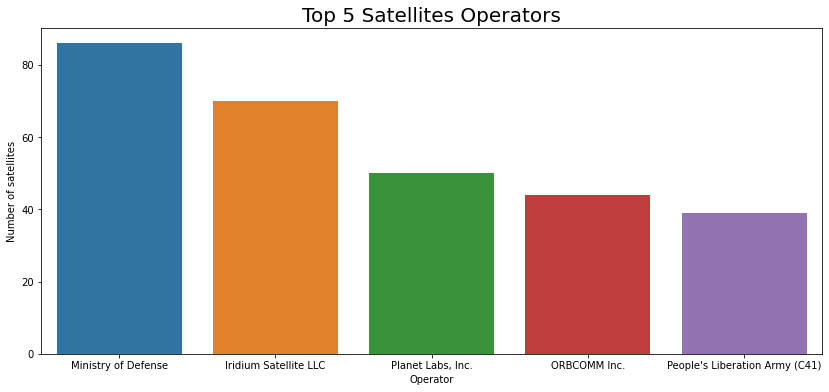

In [8]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(data['Operator'], order = data.Operator.value_counts().iloc[:5].index)

plt.title("Top 5 Satellites Operators", fontdict = {'fontsize':20})
plt.ylabel("Number of satellites")


comparar Country/Organization of UN Registry || Country of Operator/Owner
lanzamientos por año
sat con mayor y menos potencia
lazamientos por año segun el proposito

# Most Uses of Satellites

<AxesSubplot:title={'center':'Most uses of Satellites'}, xlabel='Use', ylabel='Quantity'>

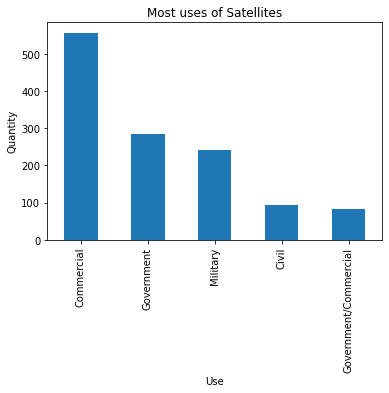

In [9]:
data['Users'].value_counts().head(5).plot(kind='bar',title='Most uses of Satellites',xlabel='Use',ylabel='Quantity')

# Timeline of Satellites launches

<AxesSubplot:title={'center':'Number of sats'}, xlabel='year of launch', ylabel='Number lauched'>

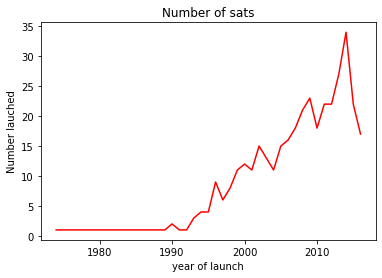

In [100]:
#we need to change the date type and work only with year
new_column = []
for i in data['Date']:
    time = pd.to_datetime(i).year
    new_column.append(time)
data['year of launch'] = new_column #now we have the year in a separate column

#group by year and then plot number of sats
group_byear = data.groupby('year of launch')
sat_year = group_byear.agg({'OperatorCountry':'nunique'}) #every country has its own counter of unique values
sat_year['OperatorCountry'].plot(kind='line',title='Number of sats',ylabel='Number lauched',color='r')

# Top launch sites

In [120]:
groupdata = data.groupby(['LaunchSite']).size() #this is a int obj, we need dataframe

geolocalor = Nominatim(user_agent='my_app').geocode('Baikonur Cosmodrome')

coord = [geolocalor.latitude,geolocalor.longitude]
coord = pd.DataFrame({'index':[0],'lat':[geolocalor.latitude],'lon':[geolocalor.longitude]})
print(coord)
gdf = gpd.GeoDataFrame(coord,geometry=gpd.points_from_xy(coord['lat'],coord['lon']))


   index        lat        lon
0      0  45.917893  63.408372


# Top Satellite Use

Text(0, 0.5, 'Purpose')

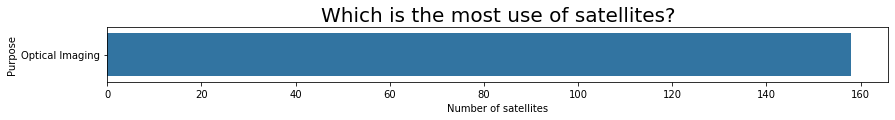

In [174]:
fig, ax = plt.subplots(figsize=(14,1))
sns.countplot(y = data['PurposeDetail'], order = data.PurposeDetail.value_counts().iloc[:1].index)

plt.title("Which is the most use of satellites?", fontdict = {'fontsize':20})
plt.xlabel("Number of satellites")
plt.ylabel("Purpose")

# Boxplot Mass of Launch

In [188]:
for i in data.index:
    if data.loc[i,'LaunchMass'] == '5,000+':
        data.loc[i,'LaunchMass'] = 5000
        
data.LaunchMass = pd.to_numeric(data.LaunchMass)

Text(0, 0.5, 'Mass')

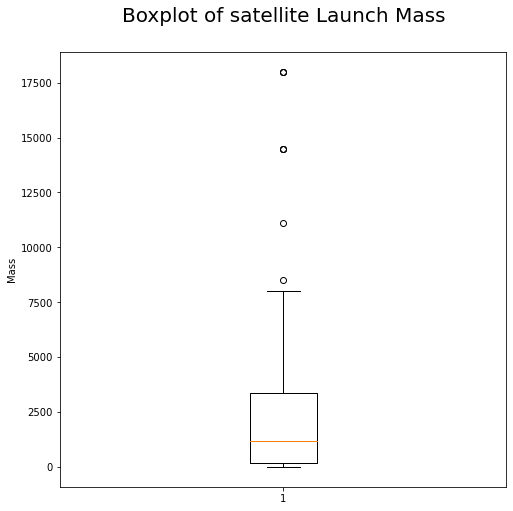

In [190]:
fig, ax = plt.subplots(figsize=(8,8))
plt.boxplot(data[data['LaunchMass'].notnull()].LaunchMass)
plt.title("Boxplot of satellite Launch Mass", fontdict = {'fontsize':20}, pad = 30.0)
plt.ylabel("Mass")

# Boxplot Expected Lifetime per Country

In [200]:
#Clean up Lifetime data
for i in data.index:
    if isinstance(data.loc[i,'Lifetime'], str):
        data.loc[i,'Lifetime'] = data.loc[i,'Lifetime'].strip(" yr.")
        data.loc[i,'Lifetime'] = data.loc[i,'Lifetime'].strip("yrs.")
        data.loc[i,'Lifetime'] = data.loc[i,'Lifetime'].strip(" trs,")
        data.loc[i,'Lifetime'] = data.loc[i,'Lifetime'].strip(" hrs.")
        if "-" in data.loc[i,'Lifetime']:
            data.loc[i,'Lifetime'] = (float(data.loc[i,'Lifetime'].split("-")[0]) + float(data.loc[i,'Lifetime'].split("-")[1])) / 2
            
data.Lifetime = pd.to_numeric(data.Lifetime)

Text(0, 0.5, 'Expected lifetime')

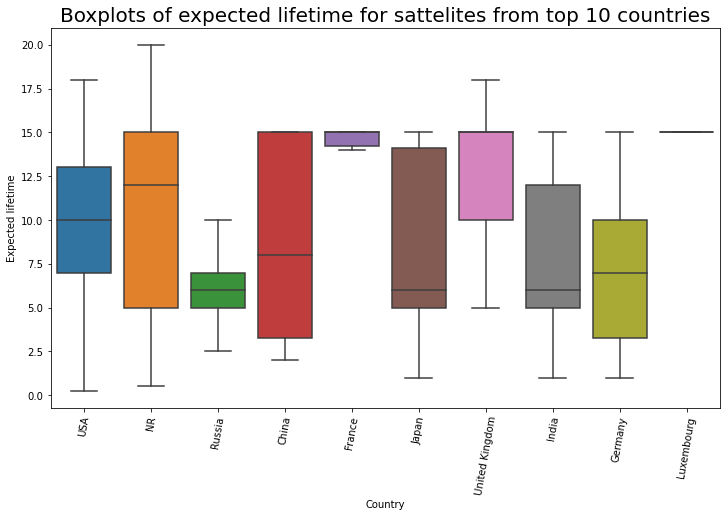

In [199]:
fig, ax = plt.subplots(figsize=(12,7))
topCountries = data.Country.value_counts().head(10).index.tolist()
sns.boxplot(x=data[data['Country'].isin(topCountries)].Country, y=data.Lifetime, order = topCountries, showfliers=False)
plt.xticks(rotation=80)
plt.title("Boxplots of expected lifetime for sattelites from top 10 countries",
          fontdict = {'fontsize':20})
plt.ylabel("Expected lifetime")

/usr/local/Caskroom/miniconda/base/envs/bigdata/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 466 rows containing missing values.


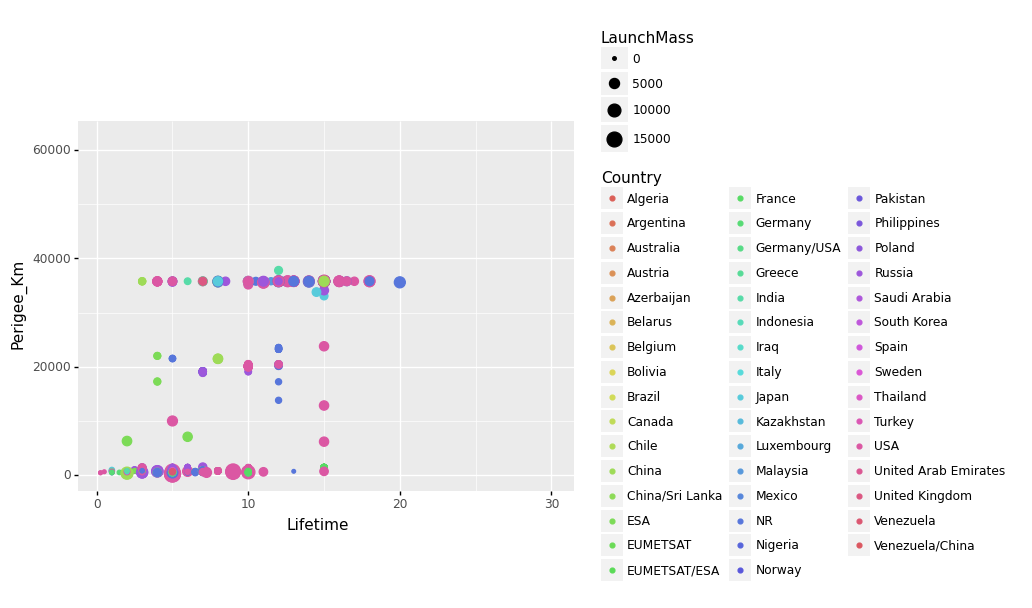

<ggplot: (308094609)>

In [213]:
ggplot(data, aes(x='Lifetime', y='Perigee_Km', 
    size = 'LaunchMass', color = 'Country')) + geom_point()